# Use CO2SYS-Matlab routine `CO2SYS.m` (in `jupyter` notebook via `octave`)

James Orr<br>

<img align="left" width="50%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png"><br><br>

LSCE/IPSL, CEA-CNRS-UVSQ, Gif-sur-Yvette, France

27 February 2018 <br><br>
updated: 29 June 2020 

**Abstract**: This notebook shows how to use the standard `CO2SYS` routine of CO2SYS-Matlab to calculate derived variables of marine CO2 system. Basic and more advanced use is illustrated.  For example, for the more advanced users, it shows how to export CO2SYS results into python and then present them in more convenient form and manipulate them more easily with python's `pandas` library. This CO2SYS-Matlab routine is used in `octave`, a GNU's clone of Matlab. You can either inspect the HTML version of this file or execute its commands interactively in your browser. But for the latter, you'll need to install `jupyter notebook`, `octave`, and `oct2py`, which includes the python-octave interface called `octavemagic`. Fortunately, that installation is very easy (see below).

#### Table of Contents:
    1. Basics (install & load octave)
    2. Octave - simple examples
    3. Using CO2SYS-Matlab in octave
    4. Run CO2SYS-Matlab on exiting CSV file
    5. Exporting CO2SYS output to Python (nicer tables, flexibility)
    6. Plot CO2SYS output

## 1. Basics

#### Run interactively

If you are visualizing this after clicking on the link to this file on github, you are seeing the HTML version of a jupyter notebook. Alternatively, you may run cells interactively and modify them if you have `jupyter notebook` installed on your machine.  To install that software, just download the anaconda open software installer for your computing platform (Windows, OS X, or Linux) from https://www.anaconda.com/ and then follow the easy install instructions at

https://docs.anaconda.com/anaconda/install/

Then just download this `jupyter notebook` file as well as the 3 routines in the src directory (`CO2SYS.m`, `errors.m`, and `derivnum.m`).  Afterwards, you'll only need to install `octave` and `oct2py` using the 1-line command in the following section.

#### Install `octavemagic`

#### To install the octavemagic funtionality, we must install `oct2py`, with the following command at the Unix prompt:

  `conda install -c conda-forge octave oct2py`
  
That command also installs `octave`. Then launch the notebook as usual with the following command:

  `jupyter notebook`

A new window or tab should then appear in your browser, showing the files in the directory from where you launched the above command. Then just click on one of the `.ipynb` files, such as this one.

Once the notebook file appears in your browser, move to any of its cells with your mouse. Run a cell by clicking on it and hitting Ctrl-Return.  Alternatively, type Shift-Return to run a cell and then move to the next one. More information on all the interactive commands is available in the Jupyter Notebook Quick Start Guide: http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html

At the top of the notebook, you'll see a number of Tabs (File, Edit, View, Insert, ...). Those tabs provide commands that will allow you to do whatever you like. Under the Help tab you'll find keyboard shortcuts for commands. Alternatively, a cheat sheet for short cuts to commands within `jupyter notebook` is available at https://zenodo.org/record/44973/files/ipynb-cheat-sheet.pdf . Or use the command palette after typing Ctrl-Shift-P.

#### Documentation for octavemagic

Details on using octavemagic are here: https://ipython.org/ipython-doc/2/config/extensions/octavemagic.html

#### Load octave magic function

Because octavemagic is now in conda's oct2py module, it is loaded with a slight modification to what is given on the above web page, i.e., now with the command below

In [1]:
%load_ext oct2py.ipython

#### Specify directory where you have the Matlab routines `CO2SYS.m`, `derivnum.m`,  and `errors.m`

In [6]:
%%octave
addpath ("~/Software/MATLAB/CO2SYS-MATLAB/src")

## 2. Simple examples of octave

#### Start octave 1 liner with `%octave`

In [2]:
%octave X = [1 2 3 4] ; mean(X)

ans =  2.5000

2.5

#### Start octave cell with `%%octave`

In [3]:
%%octave 
X = [1 2; 3 4]
mean(X)

X =

   1   2

   3   4

ans =

   2   3

## 3. Use `CO2SYS` to compute marine CO$_2$ system variables

### 3.1 Specify input variables and choices

In [7]:
%%octave

    # Input Variables:
    PAR1 = 2300;        % ALK
    PAR2 = 2000;        % DIC
    PAR1TYPE = 1;       % 1=ALK, 2=DIC, 3=pH, 4=pCO2, 5=fCO2
    PAR2TYPE = 2;       % Same 5 choices as PAR1TYPE
    SAL = 35;           % Salinity
    TEMPIN = 25;        % Temperature (input)
    TEMPOUT = 25;       % Temperature (output)
    PRESIN = 0;         % Pressure (input)
    PRESOUT = PRESIN;   % Pressure (output)
    SI = 60;            % Total dissolved inorganic silicon (Sit)
    PO4 = 2;            % Total dissoloved inorganic Phosphorus (Pt)

    # Input Parameters:
    pHSCALEIN = 2;      % pH scale (1=total, 2=seawater, 3=NBS, 4=Free)
    K1K2CONSTANTS = 15; % set for K1 & K2: (a) 10=Lueker et al. (2000); (b) 14=Millero (2010)
    KSO4CONSTANTS = 1;  % KSO4 of Dickson (1990a) & Total dissolved boron (Bt) from Uppstrom (1974)

    # Input variables for error propagation:
    r = 0.0;            % Correlation between **uncertainties** in PAR1 and PAR2 (-1 < r < 1)
    ePAR1 = 2;          % uncertainty in PAR1 (same units as PAR1)
    ePAR2 = 2;          % uncertainty in PAR2 (same units as PAR2)
    eSAL = 0;           % uncertainty in Salinity
    eTEMP = 0;          % uncertainty in Temperature
    eSI = 4;            % uncertainty in Sit
    ePO4 = 0.1;         % uncertainty in Pt
 

### 3.1 Standard CO2SYS calculation

In [8]:
%%octave
[d, dhead, dnice] = CO2SYS (PAR1, PAR2, PAR1TYPE, PAR2TYPE, SAL, TEMPIN, TEMPOUT, PRESIN, PRESOUT, SI, PO4,...
                            pHSCALEIN, K1K2CONSTANTS, KSO4CONSTANTS);

#### How do I access the resulting calculated ouput?

Display the **Header** information to see index numbers for each computed variable

In [9]:
%%octave
dhead

dhead =

{

  [1,1] = TAlk

  [2,1] = TCO2

  [3,1] = pHin

  [4,1] = pCO2in

  [5,1] = fCO2in

  [6,1] = HCO3in

  [7,1] = CO3in

  [8,1] = CO2in

  [9,1] = BAlkin

  [10,1] = OHin

  [11,1] = PAlkin

  [12,1] = SiAlkin

  [13,1] = Hfreein

  [14,1] = RFin

  [15,1] = OmegaCAin

  [16,1] = OmegaARin

  [17,1] = xCO2in

  [18,1] = pHout

  [19,1] = pCO2out

  [20,1] = fCO2out

  [21,1] = HCO3out

  [22,1] = CO3out

  [23,1] = CO2out

  [24,1] = BAlkout

  [25,1] = OHout

  [26,1] = PAlkout

  [27,1] = SiAlkout

  [28,1] = Hfreeout

  [29,1] = RFout

  [30,1] = OmegaCAout

  [31,1] = OmegaARout

  [32,1] = xCO2out

  [33,1] = pHinTOTAL

  [34,1] = pHinSWS

  [35,1] = pHinFREE

  [36,1] = pHinNBS

  [37,1] = pHoutTOTAL

  [38,1] = pHoutSWS

  [39,1] = pHoutFREE

  [40,1] = pHoutNBS

  [41,1] = TEMPIN

  [42,1] = TEMPOUT

  [43,1] = PRESIN

  [44,1] = PRESOUT

  [45,1] = PAR1TYPE

  [46,1] = PAR2TYPE

  [47,1] = K1K2CONSTANTS

  [48,1] = KSO4CONSTANTS

  [49,1] = pHSCALEIN

  [50,1] = SAL

  [51,1] = PO4

  [52,1] = SI

  [53,1] = K0input

  [54,1] = K1input

  [55,1] = K2input

  [56,1] = pK1input

  [57,1] = pK2input

  [58,1] = KWinput

  [59,1] = KBinput

  [60,1] = KFinput

  [61,1] = KSinput

  [62,1] = KP1input

  [63,1] = KP2input

  [64,1] = KP3input

  [65,1] = KSiinput

  [66,1] = K0output

  [67,1] = K1output

  [68,1] = K2output

  [69,1] = pK1output

  [70,1] = pK2output

  [71,1] = KWoutput

  [72,1] = KBoutput

  [73,1] = KFoutput

  [74,1] = KSoutput

  [75,1] = KP1output

  [76,1] = KP2output

  [77,1] = KP3output

  [78,1] = KSioutput

  [79,1] = TB

  [80,1] = TF

  [81,1] = TS

}

Display the **Nice Header** information to also see units

In [10]:
%%octave
dnice

dnice =

{

  [1,1] = 01 - TAlk             (umol/kgSW)

  [2,1] = 02 - TCO2             (umol/kgSW)

  [3,1] = 03 - pHin             ()

  [4,1] = 04 - pCO2in           (uatm)

  [5,1] = 05 - fCO2in           (uatm)

  [6,1] = 06 - HCO3in           (umol/kgSW)

  [7,1] = 07 - CO3in            (umol/kgSW)

  [8,1] = 08 - CO2in            (umol/kgSW)

  [9,1] = 09 - BAlkin           (umol/kgSW)

  [10,1] = 10 - OHin             (umol/kgSW)

  [11,1] = 11 - PAlkin           (umol/kgSW)

  [12,1] = 12 - SiAlkin          (umol/kgSW)

  [13,1] = 13 - Hfreein          (umol/kgSW)

  [14,1] = 14 - RevelleFactorin  ()

  [15,1] = 15 - OmegaCain        ()

  [16,1] = 16 - OmegaArin        ()

  [17,1] = 17 - xCO2in           (ppm)

  [18,1] = 18 - pHout            ()

  [19,1] = 19 - pCO2out          (uatm)

  [20,1] = 20 - fCO2out          (uatm)

  [21,1] = 21 - HCO3out          (umol/kgSW)

  [22,1] = 22 - CO3out           (umol/kgSW)

  [23,1] = 23 - CO2out           (umol/kgSW)

  [24,1] = 24 - BAlkout          (umol/kgSW)

  [25,1] = 25 - OHout            (umol/kgSW)

  [26,1] = 26 - PAlkout          (umol/kgSW)

  [27,1] = 27 - SiAlkout         (umol/kgSW)

  [28,1] = 28 - Hfreeout         (umol/kgSW)

  [29,1] = 29 - RevelleFactorout ()

  [30,1] = 30 - OmegaCaout       ()

  [31,1] = 31 - OmegaArout       ()

  [32,1] = 32 - xCO2out          (ppm)

  [33,1] = 33 - pHin (Total)     ()

  [34,1] = 34 - pHin (SWS)       ()

  [35,1] = 35 - pHin (Free)      ()

  [36,1] = 36 - pHin (NBS )      ()

  [37,1] = 37 - pHout(Total)     ()

  [38,1] = 38 - pHout(SWS)       ()

  [39,1] = 39 - pHout(Free)      ()

  [40,1] = 40 - pHout(NBS )      ()

  [41,1] = 41 - TEMPIN           (Deg C)

  [42,1] = 42 - TEMPOUT          (Deg C)

  [43,1] = 43 - PRESIN           (dbar)

  [44,1] = 44 - PRESOUT          (dbar)

  [45,1] = 45 - PAR1TYPE         ()

  [46,1] = 46 - PAR2TYPE         ()

  [47,1] = 47 - K1K2CONSTANTS    ()

  [48,1] = 48 - KSO4CONSTANTS    ()

  [49,1] = 49 - pHSCALEIN        ()

  [50,1] = 50 - SAL              (umol/kgSW)

  [51,1] = 51 - PO4              (umol/kgSW)

  [52,1] = 52 - SI               (umol/kgSW)

  [53,1] = 53 - K0input          ()

  [54,1] = 54 - K1input          ()

  [55,1] = 55 - K2input          ()

  [56,1] = 56 - pK1input         ()

  [57,1] = 57 - pK2input         ()

  [58,1] = 58 - KWinput          ()

  [59,1] = 59 - KBinput          ()

  [60,1] = 60 - KFinput          ()

  [61,1] = 61 - KSinput          ()

  [62,1] = 62 - KP1input         ()

  [63,1] = 63 - KP2input         ()

  [64,1] = 64 - KP3input         ()

  [65,1] = 65 - KSiinput         ()

  [66,1] = 66 - K0output         ()

  [67,1] = 67 - K1output         ()

  [68,1] = 68 - K2output         ()

  [69,1] = 69 - pK1output        ()

  [70,1] = 70 - pK2output        ()

  [71,1] = 71 - KWoutput         ()

  [72,1] = 72 - KBoutput         ()

  [73,1] = 73 - KFoutput         ()

  [74,1] = 74 - KSoutput         ()

  [75,1] = 75 - KP1output        ()

  [76,1] = 76 - KP2output        ()

  [77,1] = 77 - KP3output        ()

  [78,1] = 78 - KSioutput        ()

  [79,1] = 79 - TB               (umol/kgSW)

  [80,1] = 80 - TF               (umol/kgSW)

  [81,1] = 81 - TS               (umol/kgSW)

}

### 3.2 Verify check values for K1 & K2 from Waters et al. (2014), a formulation added to CO2SYS.m by J. Orr

In [11]:
%%octave
K1 = d(54) ; pK1 = -log10(K1) #Check value from Waters et al. (2014) is pK1 = 5.8404 (seawater scale)
K2 = d(55) ; pK2 = -log10(K2) #Check value from Waters et al. (2014) is pK2 = 8.9662 (seawater scale)

pK1 =  5.8404

pK2 =  8.9662

These values should check exactly.

IMPORTANT: The constants from Waters et al. (2014) are an update of those from Millero (2010), for which inconsistencies were identified (Orr and Epitalon, 2015; Orr et al. 2015).  I have tested constants from Waters et al. (2014), and they no longer show these inconsistencies. Therefore, they should be used in place of the constants from Millero (2010), which should no longer be used.

### 3.3 Parameters recommended for Best Practices (Dickson et al., 2007; Dickson, 2010)

In [12]:
%%octave

    pHSCALEIN = 1;      % pH scale (1=total, 2=seawater, 3=NBS, 4=Free)
    K1K2CONSTANTS = 10; % K1 & K2 (two best choices): 10=Lueker et al. (2000); 15=Waters et al. (2014)
    KSO4CONSTANTS = 1;  % KSO4 of Dickson (1990a) & Total dissolved boron (Bt) from Uppstrom (1974)
    
    
[d, dhdr, dnice] = CO2SYS (PAR1, PAR2, PAR1TYPE, PAR2TYPE, SAL, TEMPIN, TEMPOUT, PRESIN, PRESOUT, SI, PO4,...
                             pHSCALEIN, K1K2CONSTANTS, KSO4CONSTANTS);   


### 3.4 Display the calculated results when only 1 set of measurements (n=1), e.g., on 1 Niskin bottle

Show it all

In [13]:
%%octave
d

d =

 Columns 1 through 6:

   2.3000e+03   2.0000e+03   8.0384e+00   4.0459e+02   4.0330e+02   1.7784e+03

 Columns 7 through 12:

   2.1011e+02   1.1451e+01   8.9914e+01   6.5758e+00   2.2831e+00   2.5735e+00

 Columns 13 through 18:

   7.1435e-03   9.5780e+00   5.0579e+00   3.3339e+00   4.1739e+02   8.0384e+00

 Columns 19 through 24:

   4.0459e+02   4.0330e+02   1.7784e+03   2.1011e+02   1.1451e+01   8.9914e+01

 Columns 25 through 30:

   6.5758e+00   2.2831e+00   2.5735e+00   7.1435e-03   9.5780e+00   5.0579e+00

 Columns 31 through 36:

   3.3339e+00   4.1739e+02   8.0384e+00   8.0287e+00   8.1461e+00   8.1754e+00

 Columns 37 through 42:

   8.0384e+00   8.0287e+00   8.1461e+00   8.1754e+00   2.5000e+01   2.5000e+01

 Columns 43 through 48:

   0.0000e+00   0.0000e+00   1.0000e+00   2.0000e+00   1.0000e+01   1.0000e+00

 Columns 49 through 54:

   1.0000e+00   3.5000e+01   2.0000e+00   6.0000e+01   2.8392e-02   1.4218e-06

 Columns 55 through 60:

   1.0816e-09   5.8472e+00   8.9660e+00   6.0198e-14   2.5266e-09   2.3655e-03

 Columns 61 through 66:

   1.0030e-01   2.4265e-02   1.0841e-06   1.6125e-09   4.1025e-10   2.8392e-02

 Columns 67 through 72:

   1.4218e-06   1.0816e-09   5.8472e+00   8.9660e+00   6.0198e-14   2.5266e-09

 Columns 73 through 78:

   2.3655e-03   1.0030e-01   2.4265e-02   1.0841e-06   1.6125e-09   4.1025e-10

 Columns 79 through 81:

   4.1570e+02   6.8326e+01   2.8235e+04

In [14]:
%%octave
help CO2SYS

'CO2SYS' is a function from the file /homel/orr/Software/MATLAB/CO2SYS-MATLAB/src/CO2SYS.m

**************************************************************************

 First   CO2SYS.m version: 1.1 (Sep 2011)

 Current CO2SYS.m version: 2.0 (20 Dec 2016)

 CO2SYS is a MATLAB-version of the original CO2SYS for DOS.

 CO2SYS calculates and returns the state of the carbonate system of

    oceanographic water samples, if supplied with enough input.

 Please note that this software is intended to be exactly identical to the

    DOS and Excel versions that have been released previously, meaning that

    results obtained should be very nearly indentical for identical input.

 Additionally, several of the dissociation constants K1 and K2 that have

    been published since the original DOS version was written are implemented.

    For a complete list of changes since version 1.0, see below.

 For much more info please have a look at:

    Lewis, E., and D. W. R. Wallace. 1998. Program Developed for

    CO2 System Calculations. ORNL/CDIAC-105. Carbon Dioxide Information

    Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy,

    Oak Ridge, Tennessee.

    http://cdiac.ornl.gov/oceans/co2rprt.html

**************************************************************************

  **** SYNTAX:

  [RESULT,HEADERS,NICEHEADERS]=CO2SYS(PAR1,PAR2,PAR1TYPE,PAR2TYPE,...

        ...SAL,TEMPIN,TEMPOUT,PRESIN,PRESOUT,SI,PO4,pHSCALEIN,...

        ...K1K2CONSTANTS,KSO4CONSTANTS)

  **** SYNTAX EXAMPLES:

  [Result]                     = CO2SYS(2400,2200,1,2,35,0,25,4200,0,15,1,1,4,1)

  [Result,Headers]             = CO2SYS(2400,   8,1,3,35,0,25,4200,0,15,1,1,4,1)

  [Result,Headers,Niceheaders] = CO2SYS( 500,   8,5,3,35,0,25,4200,0,15,1,1,4,1)

  [A]                          = CO2SYS(2400,2000:10:2400,1,2,35,0,25,4200,0,15,1,1,4,1)

  [A]                          = CO2SYS(2400,2200,1,2,0:1:35,0,25,4200,0,15,1,1,4,1)

  [A]                          = CO2SYS(2400,2200,1,2,35,0,25,0:100:4200,0,15,1,1,4,1)

  **** APPLICATION EXAMPLE (copy and paste this into command window):

  tmps=0:40; sals=0:40; [X,Y]=meshgrid(tmps,sals);

  A = CO2SYS(2300,2100,1,2,Y(:),X(:),nan,0,nan,1,1,1,9,1);

  Z=nan(size(X)); Z(:)=A(:,4); figure; contourf(X,Y,Z,20); caxis([0 1200]); colorbar;

  ylabel('Salinity [psu]'); xlabel('Temperature [degC]'); title('Dependence of pCO2 [uatm] on T and S')

**************************************************************************

 INPUT:

   PAR1  (some unit) : scalar or vector of size n

   PAR2  (some unit) : scalar or vector of size n

   PAR1TYPE       () : scalar or vector of size n (*)

   PAR2TYPE       () : scalar or vector of size n (*)

   SAL            () : scalar or vector of size n

   TEMPIN  (degr. C) : scalar or vector of size n

   TEMPOUT (degr. C) : scalar or vector of size n

   PRESIN     (dbar) : scalar or vector of size n

   PRESOUT    (dbar) : scalar or vector of size n

   SI    (umol/kgSW) : scalar or vector of size n

   PO4   (umol/kgSW) : scalar or vector of size n

   pHSCALEIN         : scalar or vector of size n (**)

   K1K2CONSTANTS     : scalar or vector of size n (***)

   KSO4CONSTANTS     : scalar or vector of size n (****)

  (*) Each element must be an integer,

      indicating that PAR1 (or PAR2) is of type:

  1 = Total Alkalinity

  2 = DIC

  3 = pH

  4 = pCO2

  5 = fCO2

  (**) Each element must be an integer,

       indicating that the pH-input (PAR1 or PAR2, if any) is at:

  1 = Total scale

  2 = Seawater scale

  3 = Free scale

  4 = NBS scale

  (***) Each element must be an integer,

        indicating the K1 K2 dissociation constants that are to be used:

   1 = Roy, 1993											T:    0-45  S:  5-45. Total scale. Artificial seawater.

   2 = Goyet & Poisson										T:   -1-40  S: 10-50. Seaw. scale. Artificial seawater.

   3 = HANSSON              refit BY DICKSON AND MILLERO	T:    2-35  S: 20-40. Seaw. scale. Artificial seawater.

   4 = MEHRBACH             refit BY DICKSON AND MILLERO	T:    2-35  S: 20-40. Seaw. scale. Artificial seawater.

   5 = HANSSON and MEHRBACH refit BY DICKSON AND MILLERO	T:    2-35  S: 20-40. Seaw. scale. Artificial seawater.

   6 = GEOSECS (i.e., original Mehrbach)					T:    2-35  S: 19-43. NBS scale.   Real seawater.

   7 = Peng	(i.e., originam Mehrbach but without XXX)	T:    2-35  S: 19-43. NBS scale.   Real seawater.

   8 = Millero, 1979, FOR PURE WATER ONLY (i.e., Sal=0)	T:    0-50  S:     0.

   9 = Cai and Wang, 1998									T:    2-35  S:  0-49. NBS scale.   Real and artificial seawater.

  10 = Lueker et al, 2000									T:    2-35  S: 19-43. Total scale. Real seawater.

  11 = Mojica Prieto and Millero, 2002.					T:    0-45  S:  5-42. Seaw. scale. Real seawater

  12 = Millero et al, 2002									T: -1.6-35  S: 34-37. Seaw. scale. Field measurements.

  13 = Millero et al, 2006									T:    0-50  S:  1-50. Seaw. scale. Real seawater.

  14 = Millero        2010  									T:    0-50  S:  1-50. Seaw. scale. Real seawater.

  15 = Waters, Millero, & Woosley 2014  							T:    0-50  S:  1-50. Seaw. scale. Real seawater.

  (****) Each element must be an integer that

         indicates the KSO4 dissociation constants that are to be used,

         in combination with the formulation of the borate-to-salinity ratio to be used.

         Having both these choices in a single argument is somewhat awkward,

         but it maintains syntax compatibility with the previous version.

  1 = KSO4 of Dickson 1990a   & TB of Uppstrom 1974  (PREFERRED)

  2 = KSO4 of Khoo et al 1977 & TB of Uppstrom 1974

  3 = KSO4 of Dickson 1990a   & TB of Lee 2010

  4 = KSO4 of Khoo et al 1977 & TB of Lee 2010

**************************************************************************%

 OUTPUT: * an array containing the following parameter values (one row per sample):

         *  a cell-array containing crudely formatted headers

         *  a cell-array containing nicely formatted headers

    POS  PARAMETER        UNIT

    01 - TAlk                 (umol/kgSW)

    02 - TCO2                 (umol/kgSW)

    03 - pHin                 ()

    04 - pCO2 input           (uatm)

    05 - fCO2 input           (uatm)

    06 - HCO3 input           (umol/kgSW)

    07 - CO3 input            (umol/kgSW)

    08 - CO2 input            (umol/kgSW)

    09 - BAlk input           (umol/kgSW)

    10 - OH input             (umol/kgSW)

    11 - PAlk input           (umol/kgSW)

    12 - SiAlk input          (umol/kgSW)

    13 - Hfree input          (umol/kgSW)

    14 - RevelleFactor input  ()

    15 - OmegaCa input        ()

    16 - OmegaAr input        ()

    17 - xCO2 input           (ppm)

    18 - pH output            ()

    19 - pCO2 output          (uatm)

    20 - fCO2 output          (uatm)

    21 - HCO3 output          (umol/kgSW)

    22 - CO3 output           (umol/kgSW)

    23 - CO2 output           (umol/kgSW)

    24 - BAlk output          (umol/kgSW)

    25 - OH output            (umol/kgSW)

    26 - PAlk output          (umol/kgSW)

    27 - SiAlk output         (umol/kgSW)

    28 - Hfree output         (umol/kgSW)

    29 - RevelleFactor output ()

    30 - OmegaCa output       ()

    31 - OmegaAr output       ()

    32 - xCO2 output          (ppm)

    33 - pH input (Total)     ()

    34 - pH input (SWS)       ()

    35 - pH input (Free)      ()

    36 - pH input (NBS)       ()

    37 - pH output (Total)    ()

    38 - pH output (SWS)      ()

    39 - pH output (Free)     ()

    40 - pH output (NBS)      ()

    41 - TEMP input           (deg C)     ***

    42 - TEMPOUT              (deg C)     ***

    43 - PRES input           (dbar or m) ***

    44 - PRESOUT              (dbar or m) ***

    45 - PAR1TYPE             (integer)   ***

    46 - PAR2TYPE             (integer)   ***

    47 - K1K2CONSTANTS        (integer)   ***

    48 - KSO4CONSTANTS        (integer)   ***

    49 - pHSCALE of input     (integer)   ***

    50 - SAL                  (psu)       ***

    51 - PO4                  (umol/kgSW) ***

    52 - SI                   (umol/kgSW) ***

    53 - K0  input            ()

    54 - K1  input            ()

    55 - K2  input            ()

    56 - pK1 input            ()

    57 - pK2 input            ()

    58 - KW  input            ()

    59 - KB  input            ()

    60 - KF  input            ()

    61 - KS  input            ()

    62 - KP1 input            ()

    63 - KP2 input            ()

    64 - KP3 input            ()

    65 - KSi input            ()

    66 - K0  output           ()

    67 - K1  output           ()

    68 - K2  output           ()

    69 - pK1 output           ()

    70 - pK2 output           ()

    71 - KW  output           ()

    72 - KB  output           ()

    73 - KF  output           ()

    74 - KS  output           ()

    75 - KP1 output           ()

    76 - KP2 output           ()

    77 - KP3 output           ()

    78 - KSi output           ()

    79 - TB                   (umol/kgSW)

    80 - TF                   (umol/kgSW)

    81 - TS                   (umol/kgSW)

    82 - TP                   (umol/kgSW)

    83 - TSi                  (umol/kgSW)

    *** SIMPLY RESTATES THE INPUT BY USER

 In all the above, the terms "input" and "output" may be understood

    to refer to the 2 scenarios for which CO2SYS performs calculations,

    each defined by its own combination of temperature and pressure.

    For instance, one may use CO2SYS to calculate, from measured DIC and TAlk,

    the pH that that sample will have in the lab (e.g., T=25 degC, P=0 dbar),

    and what the in situ pH would have been (e.g., at T=1 degC, P=4500).

    A = CO2SYS(2400,2200,1,2,35,25,1,0,4200,1,1,1,4,1)

    pH_lab = A(3);  % 7.84

    pH_sea = A(18); % 8.05

**************************************************************************

 This is version 2.0 (uploaded to CDIAC at SEP XXth, 2011):

 **** Changes since 2.0

	- slight changes to allow error propagation

	- new option to choose K1 & K2 from Waters et al. (2014): fixes inconsistencies with Millero (2010) identified by Orr et al. (2015)

 **** Changes since 1.01 (uploaded to CDIAC at June 11th, 2009):

 - Function cleans up its global variables when done (if you loose variables, this may be the cause -- see around line 570)

 - Added the outputting of K values

 - Implementation of constants of Cai and Wang, 1998

 - Implementation of constants of Lueker et al., 2000

 - Implementation of constants of Mojica-Prieto and Millero, 2002

 - Implementation of constants of Millero et al., 2002 (only their eqs. 19, 20, no TCO2 dependency)

 - Implementation of constants of Millero et al., 2006

 - Implementation of constants of Millero et al., 2010

 - Properly listed Sal and Temp limits for the available constants

 - added switch for using the new Lee et al., (2010) formulation of Total Borate (see KSO4CONSTANTS above)

 - Minor corrections to the GEOSECS constants (gave NaN for some output in earlier version)

 - Fixed decimal point error on [H+] (did not get converted to umol/kgSW from mol/kgSW).

 - Changed 'Hfreein' to 'Hfreeout' in the 'NICEHEADERS'-output (typo)

 **** Changes since 1.00 (uploaded to CDIAC at May 29th, 2009):

 - added a note explaining that all known bugs were removed before release of 1.00

**************************************************************************

 CO2SYS originally by Lewis and Wallace 1998

 Converted to MATLAB by Denis Pierrot at

 CIMAS, University of Miami, Miami, Florida

 Vectorization, internal refinements and speed improvements by

 Steven van Heuven, University of Groningen, The Netherlands.

 Questions, bug reports et cetera: svheuven@gmail.com

**************************************************************************

Additional help for built-in functions and operators is

available in the online version of the manual.  Use the command

'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW

at http://www.octave.org and via the help@octave.org

mailing list.

In [15]:
%%octave
help errors

'errors' is a function from the file /homel/orr/Software/MATLAB/CO2SYS-MATLAB/src/errors.m

 errors()

 This subroutine propagates uncertainties for the marine carbonate chemistry calculations

 from errors (or uncertainties) on six input

  - pair of carbonate system variables

  - nutrients (silicate and phosphate concentrations)

  - temperature and salinity

 plus errors in dissociation constants pK0, pK1, pK2, pKb, pKw, pKspa, and pKspc as well as total boron

 It calls derivnum, which computes numerical derivatives, and then

 it applies error propagation using the method of moments.

 The latter is a general technique to estimate the 2nd moment of a variable z

 (variance or standard deviation) based on a 1st-order approximation to z.

**************************************************************************

  **** SYNTAX:

  [err, headers, units] = errors(PAR1,PAR2,PAR1TYPE,PAR2TYPE,..  .

                                     SAL,TEMPIN,TEMPOUT,PRESIN,PRESOUT,SI,PO4,...

                                     ePAR1,ePAR2,eSAL,eTEMP,eSI,ePO4,epK,eBt,r,...

                                     pHSCALEIN,K1K2CONSTANTS,KSO4CONSTANTS)

  **** SYNTAX EXAMPLES:

  [Result]                = errors(2400,2200,1,2,35,10,10,0,0,15,1,2,2,0.01,0.01,0,0,0,0,0,1,4,1)

  [Result,Headers]        = errors(2400,   8,1,3,35,25,5,0,3000,15,1,2,0.001,0,0,0,0,0,0,0,1,4,1)

  [Result,Headers,Units]  = errors(500,    8,5,3,35,25,5,0,4000,15,1,2,0.001,0,0,0,0,'','',0,1,4,1)

  [A]                     = errors(2400,2000:10:2400,1,2,35,10,10,0,0,15,2,2,0,0,0,0,'','',0,1,1,4,1)

  [A]                     = errors(2400,2200,1,2,0:1:35,0,25,4200,0,15,1,2,2,0,0,0,0,'','',0,1,4,1)

  epK = [0.002, 0.0075, 0.015, 0.01, 0.01, 0.02, 0.02];

  eBt = 0.02;

  [A, hdr, units]   = errors(2400,2200,1,2,35,0,25,0:100:4200,0,15,1,2,2,0,0,0,0,epK,eBt,0,1,4,1)

**************************************************************************

 INPUT:

   - ePAR1, ePAR2   :  uncertainty of PAR1 and PAR2 of input pair of CO2 system variables (same units as PAR1 & PAR2)

   - eS, eT         :  uncertainty of Salinity and Temperature (same units as S and T)

   - ePO4, eSI      :  uncertainty of Phosphate and Silicate total concentrations (same units as PO4 and SI [umol/kg])

   - epK            :  uncertainty of all seven dissociation constants (a vector) [pK units]

   - eBt            :  uncertainty of total boron, given as fractional relative error (eBt=0.02 is a 2% error)

   - r              :  correlation coefficient between PAR1 AND PAR2 (typicaly 0)

   - others         :  same as input for subroutine  CO2SYS() : scalar or vectors

 All parameters may be scalars or vectors except epK and eBt.

   * epK must be vector of 7 values : errors of [pK0, pK1, pK2, pKb, pKw, pKspa, pKspc].

     These errors are assumed to be the same for all rows of data.

     These 7 values are in pK units

     if epK is empty (= ''), this routine specifies default values.

     These default standard errors are :

        pK0   :  0.002

        pK1   :  0.0075

        pK2   :  0.015

        pKb   :  0.01    boric acid

        pKw   :  0.01    water dissociation

        pKspa :  0.02    solubility product of Aragonite

        pKspc :  0.02    solubility product of Calcite

   * eBt is a scalar real number, fractional relative error (between 0.00 and 1.00)

     for TB, where the default is eBt=0.02. It is assumed to be the same

     for all rows of data.

 In constrast, ePAR1, ePAR2, eS, eT, ePO4 and eSI,

   - if vectors, are errors associated with each data point

   - if scalars, are one error value associated to all data points

 The same for parameter "r".

 If 'r' is nonzero with a value between -1.0 and 1.0, it indicates the correlation

 between uncertainties of the input pair of carbonate system variables.

 By default, 'r' is zero. However, for some pairs the user may want to specify a

 different value. For example, measurements of pCO2 and pH are often anti-correlated.

 The same goes for two other pairs: 'CO2 and CO3' and 'pCO2 and

 CO3'. But even for these cases, care is needed when using non-zero values of 'r'.

 When the user propagates errors for an individual

 measurement, 'r' should ALWAYS be zero if each member of the input pair is

 measured independently. In this case, we are interested in the

 correlation between the uncertainties in those measurements, not in

 the correlation between the measurments themselves. Uncertainties from

 those measurements are probably not correlated if they come from

 different instruments. Conversely, if users are interested in the

 error in the mean of a distribution of measurements (i.e., if they are

 propagating standard errors instead of standard deviations), one

 should then also account for the correlation between the measurements of

 the two variables of the input pair.

 For input pairs where one member is pH, this 'errors' routine automatically

 inverses the sign of 'r'.

 That inversion is done because the associated derivatives are computed in terms of

 the hydrogen ion concentration H+, not pH. Therefore for each of these 6

 flags, if the user wants to compute 'r' that should be done (1) using

 the H+ concentration instead of pH, and (2) the sign of that computed 'r'

 should be inversed when passing it as an argument to this routine.

 To express perfect anticorrelation with pH, the user should

 use 'r=-1.0'.

**************************************************************************

 OUTPUT: * an array containing uncertainty for the following variables

           (one row per sample):

         *  a cell-array containing crudely formatted headers

    POS  PARAMETER        UNIT

    01 - TAlk                 (umol/kg)

    02 - TCO2                 (umol/kg)

    03   fCO2in               (uatm)

    04 - HCO3in               (umol/kg)

    05 - CO3in                (umol/kg)

    06 - CO2in                (umol/kg)

    07 - OmegaCAin            ()

    08 - OmegaARin            ()

    09 - xCO2in               (ppm)

    10 - Hout                 (nmol/kg)

    11 - pCO2out              (uatm)

    12 - fCO2out              (uatm)

    13 - HCO3out              (umol/kg)

    14 - CO3out               (umol/kg)

    15 - CO2out               (umol/kg)

    16 - OmegaCAout           ()

    17 - OmegaARout           ()

    18 - xCO2out              (ppm)

 NOTE: Only uncertainties for the output variables are provided.

       The 1st 2 columns will change as a function of PAR1TYPE and PAR2TYPE.

       In the case above, the input pair is pH-pCO2 (PAR1TYPE=3, PAR2TYPE=4).

       That is why the results in the first 2 columns are for the other 2

       possible input variables (TAlk and TCO2)

 EXAMPLE: a nice way to see the headers & units along with the results

 [e, ehead, eunits] = errors (PAR1,PAR2,PAR1TYPE,PAR2TYPE,SAL,TEMPIN,TEMPOUT,PRESIN,PRESOUT,SI,PO4,...

                              ePAR1,ePAR2,eSAL,eTEMP,eSI,ePO4,epK,eBt,r,pHSCALEIN,K1K2CONSTANTS,KSO4CONSTANTS);

  printf("%s   %s %s %s %s  %s %s %s %s \n", ehead{1:9});

  printf("%s   %s  %s    %s %s %s    %s      %s          %s \n", eunits{1:9});

  printf("%f  %f  %f  %f  %f %f  %f     %f     %f \n", e(1:9));

Additional help for built-in functions and operators is

available in the online version of the manual.  Use the command

'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW

at http://www.octave.org and via the help@octave.org

mailing list.

Select some output

In [16]:
%%octave
dhead(1:6)
d(1:6)

ans =

{

  [1,1] = TAlk

  [2,1] = TCO2

  [3,1] = pHin

  [4,1] = pCO2in

  [5,1] = fCO2in

  [6,1] = HCO3in

}

ans =

   2300.0000   2000.0000      8.0384    404.5931    403.3026   1778.4365

A bit nicer to read

In [17]:
%%octave
printf ("%s %s %s %s %s %s\n", dhead{1:6})
printf ("%f %f %f %f %f %f\n", d(1:6))

TAlk TCO2 pHin pCO2in fCO2in HCO3in

2300.000000 2000.000000 8.038366 404.593062 403.302596 1778.436480

Get all the usual output, but only at the input *T* and *P* (don't show results at *output* *T* and *P*) 

In [18]:
%%octave
#printf ("%s %s %s %s %s %s\n", Headers(1:6))
printf ("%s %s %s %s %s %s %s %s %s %s\n", dhead{1:8}, dhead{14}, dhead{16})
printf ("%f %f %f %f %f %f %f %f %f %f\n", d(1:8),     d(14),     d(16))

TAlk TCO2 pHin pCO2in fCO2in HCO3in CO3in CO2in RFin OmegaARin

2300.000000 2000.000000 8.038366 404.593062 403.302596 1778.436480 210.113000 11.450520 9.578002 3.333851

### 3.5 Display results more nicely by exporting to python (n=1)

#### Export to python

Notes:
1. An octave cell must begin with the first line as '%%octave'
2. Otherwise, cells are python cells (by default)
3. Any line beginning with %octave is an octave command on only one line

In [19]:
# import python's numpy library
import numpy as np

# Export d to python, renaming it D
%octave -o D D=d(1:6);

# Export dhead to python, renaming id Dhead
%octave -o Dhead Dhead=dhead;

D = np.array(D)
Dhead = np.array(Dhead)
Dhead = Dhead[0:6]

print(Dhead)
print(D)

['TAlk' 'TCO2' 'pHin' 'pCO2in' 'fCO2in' 'HCO3in']
[[2300.         2000.            8.03836606  404.5930618   403.30259551
  1778.43647997]]


#### Display in nice table (after creating pandas DataFrame)

In [20]:
import pandas as pd
#import numpy as np

pad = pd.DataFrame(D, columns=Dhead)
pad

,TAlk,TCO2,pHin,pCO2in,fCO2in,HCO3in
0,2300.0,2000.0,8.038366,404.593062,403.302596,1778.43648


### 3.5 Display the results when n >1 (more than 1 line of input)

Make same calculation but at 4 temperatures

In [21]:
%%octave

TEMPIN     = [0:10:30];
TEMPIN

# If any input array has more than 1 member, all others will be duplicated to reach that number
# (input arrays must have either n=1 or the same as the maximum n)
[d, dhdr, dnice] = CO2SYS (PAR1, PAR2, PAR1TYPE, PAR2TYPE, SAL, TEMPIN, TEMPOUT, PRESIN, PRESOUT, SI, PO4,...
                             pHSCALEIN, K1K2CONSTANTS, KSO4CONSTANTS);   
# Show calculated pCO2
d(:,4)


TEMPIN =

    0   10   20   30

ans =

   137.25

   215.88

   330.08

   493.46

Define output arrays knowing the CO2SYS index numbers (get these from dhdr or dnice)

* A colon (:) means all members of that index.


In [22]:
%%octave

ALK     = d(:,1);    %01 - TAlk                 (umol/kgSW)
DIC     = d(:,2);    %02 - TCO2                 (umol/kgSW)
pH      = d(:,3);    %03 - pHin                 ()
pCO2    = d(:,4);    %04 - pCO2 input           (uatm)
fCO2    = d(:,5);    %05 - fCO2 input           (uatm)
HCO3    = d(:,6);    %06 - HCO3 input           (umol/kgSW)
CO3     = d(:,7);    %07 - CO3 input            (umol/kgSW)
CO2     = d(:,8);    %08 - CO2 input            (umol/kgSW)
Hfree   = d(:,13);   %13 - Hfree input          (umol/kgSW)
RF      = d(:,14);   %14 - RevelleFactor input  ()
OmegaCa = d(:,15);   %15 - OmegaCa input        ()
OmegaAr = d(:,16);   %16 - OmegaAr input        ()
xCO2    = d(:,17);   %17 - xCO2 input           (ppm)


Display the results in a concise manner (formatted)

In [23]:
%%octave
printf('%s          %s     %s     %s    %s    %s   %s    %s    %s      %s     %s    %s \n', 
       'T', 'ALK', 'DIC', 'pH', 'pCO2', 'fCO2', 'xCO2', 'HCO3', 'CO3', 'CO2', 'RF', 'OmegaAr')
for i=1 : length(pCO2)
    printf('%7.3f %7.1f %7.1f %7.4f %6.1f %6.1f %6.1f, %7.1f %7.1f %6.2f %f %6.1f\n', 
           TEMPIN(i), ALK(i), DIC(i), 
           pH(i), pCO2(i), fCO2(i), xCO2(i), HCO3(i), CO3(i), CO2(i), RF(i), OmegaAr(i));
end

T          ALK     DIC     pH    pCO2    fCO2   xCO2    HCO3    CO3      CO2     RF    OmegaAr

  0.000  2300.0  2000.0  8.4345  137.2  136.6  138.1,  1792.1   199.3   8.59 9.848596    3.0

 10.000  2300.0  2000.0  8.2705  215.9  215.1  218.5,  1786.8   203.8   9.44 9.761787    3.1

 20.000  2300.0  2000.0  8.1143  330.1  329.0  337.7,  1781.2   208.2  10.66 9.648567    3.2

 30.000  2300.0  2000.0  7.9636  493.5  492.0  514.6,  1775.8   211.8  12.38 9.496288    3.4

Write out those same results to a output file (CSV file)

In [24]:
%%octave

fileout = 'test.csv';
fid = fopen(fileout, 'w');

fprintf(fid,'%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s \n', 
       'T', 'ALK', 'DIC', 'pH', 'pCO2', 'fCO2', 'xCO2', 'HCO3', 'CO3', 'CO2', 'RF', 'OmegaAr');
for i=1 : length(pCO2)
    fprintf(fid,'%f, %f, %f, %f, %f, %f, %f, %f, %f, %f, %f, %f\n', 
           TEMPIN(i), ALK(i), DIC(i), 
           pH(i), pCO2(i), fCO2(i), xCO2(i), HCO3(i), CO3(i), CO2(i), RF(i), OmegaAr(i));
end
fclose('all');

#### Display the contents of the file that was just written out (using Unix shell command `cat`)

In [25]:
#!echo $PWD
!cat test.csv

T, ALK, DIC, pH, pCO2, fCO2, xCO2, HCO3, CO3, CO2, RF, OmegaAr 
0.000000, 2300.000000, 2000.000000, 8.434464, 137.246686, 136.643633, 138.062822, 1792.126232, 199.282966, 8.590802, 9.848596, 3.001708
10.000000, 2300.000000, 2000.000000, 8.270520, 215.884104, 215.052981, 218.479058, 1786.768907, 203.794720, 9.436373, 9.761787, 3.087672
20.000000, 2300.000000, 2000.000000, 8.114276, 330.079951, 328.960457, 337.720051, 1781.162173, 208.177059, 10.660768, 9.648567, 3.235996
30.000000, 2300.000000, 2000.000000, 7.963633, 493.455490, 491.973589, 514.590128, 1775.830647, 211.785716, 12.383637, 9.496288, 3.448190


#### Display nice version of same table (using pandas to read in CSV file)

Following cell is in `python` (default), because it does not start with `%%octave`

In [26]:
df=pd.read_csv('test.csv', sep=',')
df

,T,ALK,DIC,pH,pCO2,fCO2,xCO2,HCO3,CO3,CO2,RF,OmegaAr
0,0.0,2300.0,2000.0,8.434464,137.246686,136.643633,138.062822,1792.126232,199.282966,8.590802,9.848596,3.001708
1,10.0,2300.0,2000.0,8.270520,215.884104,215.052981,218.479058,1786.768907,203.794720,9.436373,9.761787,3.087672
2,20.0,2300.0,2000.0,8.114276,330.079951,328.960457,337.720051,1781.162173,208.177059,10.660768,9.648567,3.235996
3,30.0,2300.0,2000.0,7.963633,493.455490,491.973589,514.590128,1775.830647,211.785716,12.383637,9.496288,3.448190


## 4. Read CSV file for input to CO2SYS

#### Show contents of input data file

In [27]:
!cat Alk-pH-P-vary-for-CO2sys-Matlab.csv

var1,var2,var1type,var2type,S,T,P
8.046626,2300,3,1,35,13,0
8.046626,2300,3,1,35,13,500
8.046626,2300,3,1,35,13,1000
8.046626,2300,3,1,35,13,1500
8.046626,2300,3,1,35,13,2000
8.046626,2300,3,1,35,13,2500
8.046626,2300,3,1,35,13,3000
8.046626,2300,3,1,35,13,3500
8.046626,2300,3,1,35,13,4000
8.046626,2300,3,1,35,13,4500
8.046626,2300,3,1,35,13,5000
8.046626,2300,3,1,35,13,5500
8.046626,2300,3,1,35,13,6000
8.046626,2300,3,1,35,13,6500
8.046626,2300,3,1,35,13,7000
8.046626,2300,3,1,35,13,7500
8.046626,2300,3,1,35,13,8000
8.046626,2300,3,1,35,13,8500
8.046626,2300,3,1,35,13,9000
8.046626,2300,3,1,35,13,9500
8.046626,2300,3,1,35,13,10000


#### Read input data, assign to input variables, and compute C chem variables  with CO2SYS

In [28]:
%%octave
    filein = 'Alk-pH-P-vary-for-CO2sys-Matlab.csv';
    datin  = csvread(filein, 1, 0);

#   Transpose array so that columns become rows (and vice versa)
    datin = transpose(datin);
    
    par1     = datin(1,:);
    par2     = datin(2,:);
    par1type = datin(3,:);
    par2type = datin(4,:);
    sal      = datin(5,:);
    tempin   = datin(6,:);
    presin   = datin(7,:); 

#   Specify remaining input data
    tempout  = 0;   % not used
    presout  = 0;   % not used
    sil      =    0; % Concentration of Sit  in the sample (in umol/kg)
    po4      =    0; % Concentration of Pt in the sample (in umol/kg)
    pHscale  =    1; % pH scale at which the input pH is reported ("1" means "Total Scale")
    k1k2c    =   10; % K1 & K2   ("10" means "Lueker et al., 2000")
    kso4c    =    1; % KSO4 & Bt ("1" means "KSO4 from Dickson 1990a & Bt from Uppstrom 1974")
    
    b = CO2SYS(par1, par2, par1type, par2type, sal, tempin, tempout, presin,presout,sil,po4,pHscale,k1k2c,kso4c);

#### Assign output variables by CO2SYS index

In [29]:
%%octave

ALK     = b(:,1);    %01 - TAlk                 (umol/kgSW)
DIC     = b(:,2);    %02 - TCO2                 (umol/kgSW)
pH      = b(:,3);    %03 - pHin                 ()
pCO2    = b(:,4);    %04 - pCO2 input           (uatm)
fCO2    = b(:,5);    %05 - fCO2 input           (uatm)
HCO3    = b(:,6);    %06 - HCO3 input           (umol/kgSW)
CO3     = b(:,7);    %07 - CO3 input            (umol/kgSW)
CO2     = b(:,8);    %08 - CO2 input            (umol/kgSW)
Hfree   = b(:,13);   %13 - Hfree input          (umol/kgSW)
RF      = b(:,14);   %14 - RevelleFactor input  ()
OmegaCa = b(:,15);   %15 - OmegaCa input        ()
OmegaAr = b(:,16);   %16 - OmegaAr input        ()
xCO2    = b(:,17);   %17 - xCO2 input           (ppm)

#### Display results

In [30]:
%%octave
printf('%s          %s     %s     %s     %s   %s   %s    %s     %s     %s     %s    %s \n', 
       'T', 'ALK', 'DIC', 'pH', 'pCO2', 'fCO2', 'xCO2', 'HCO3', 'CO3', 'CO2', 'RF', 'OmegaAr')

for i=1 : length(pCO2)
    printf('%7.3f, %7.1f %7.1f %7.4f %6.1f %6.1f %6.1f, %7.1f %7.1f %6.2f %7.3f %6.3f\n', 
           tempin(i), ALK(i), DIC(i), 
           pH(i), pCO2(i), fCO2(i), xCO2(i), HCO3(i), CO3(i), CO2(i), RF(i), OmegaAr(i));
end

T          ALK     DIC     pH     pCO2   fCO2   xCO2    HCO3     CO3     CO2     RF    OmegaAr

 13.000,  2300.0  2095.9  8.0466  399.4  397.9  405.3,  1932.1   148.0  15.85  11.970  2.254

 13.000,  2300.0  2087.3  8.0466  377.4  376.0  383.0,  1920.1   152.1  14.98  11.732  2.136

 13.000,  2300.0  2078.5  8.0466  356.7  355.4  362.0,  1907.9   156.4  14.16  11.499  2.025

 13.000,  2300.0  2069.6  8.0466  337.1  335.9  342.1,  1895.5   160.7  13.38  11.272  1.921

 13.000,  2300.0  2060.5  8.0466  318.6  317.5  323.3,  1882.7   165.2  12.65  11.051  1.823

 13.000,  2300.0  2051.3  8.0466  301.2  300.0  305.6,  1869.7   169.6  11.95  10.837  1.730

 13.000,  2300.0  2042.0  8.0466  284.7  283.6  288.8,  1856.5   174.2  11.30  10.629  1.643

 13.000,  2300.0  2032.5  8.0466  269.1  268.1  273.0,  1842.9   178.8  10.68  10.429  1.561

 13.000,  2300.0  2022.8  8.0466  254.3  253.4  258.1,  1829.2   183.5  10.09  10.235  1.484

 13.000,  2300.0  2013.0  8.0466  240.4  239.5  243.9,  1815.2   188.3   9.54  10.049  1.412

 13.000,  2300.0  2003.1  8.0466  227.2  226.4  230.6,  1800.9   193.2   9.02   9.869  1.343

 13.000,  2300.0  1993.0  8.0466  214.8  214.0  218.0,  1786.4   198.1   8.53   9.697  1.279

 13.000,  2300.0  1982.8  8.0466  203.0  202.3  206.0,  1771.7   203.1   8.06   9.533  1.218

 13.000,  2300.0  1972.5  8.0466  191.9  191.2  194.8,  1756.8   208.1   7.62   9.375  1.160

 13.000,  2300.0  1962.1  8.0466  181.4  180.8  184.1,  1741.6   213.2   7.20   9.225  1.106

 13.000,  2300.0  1951.5  8.0466  171.5  170.9  174.0,  1726.3   218.4   6.81   9.081  1.055

 13.000,  2300.0  1940.8  8.0466  162.1  161.5  164.5,  1710.7   223.7   6.44   8.944  1.006

 13.000,  2300.0  1930.1  8.0466  153.3  152.7  155.5,  1695.0   229.0   6.08   8.814  0.960

 13.000,  2300.0  1919.2  8.0466  144.9  144.4  147.0,  1679.1   234.3   5.75   8.691  0.917

 13.000,  2300.0  1908.2  8.0466  137.0  136.5  139.0,  1663.0   239.7   5.44   8.574  0.876

 13.000,  2300.0  1897.2  8.0466  129.5  129.0  131.4,  1646.8   245.2   5.14   8.463  0.837

### 5. Pull arrays (from octave to python), then use `pandas` to display a nice table

Pull arrays, then combine into a `pandas` DataFrame

In [31]:
%octave_pull tempin ALK DIC pH pCO2 fCO2 xCO2 HCO3 CO3 CO2 RF OmegaAr

#print(tempin)
pieces = [ALK, DIC, pH, pCO2, fCO2, xCO2, HCO3, CO3, CO2, RF, OmegaAr]
pieces = np.array(pieces)
pieces = np.squeeze(pieces)
pieces = np.transpose(pieces)
cols = list(['ALK', 'DIC', 'pH', 'pCO2', 'fCO2', 'xCO2', 'HCO3', 'CO3', 'CO2', 'RF', 'OmegaAr'])
#pad = pd.DataFrame(pieces, index=list(tempin), columns=cols)
df = pd.DataFrame(pieces, columns=cols)
df

,ALK,DIC,pH,pCO2,fCO2,xCO2,HCO3,CO3,CO2,RF,OmegaAr
0,2300.0,2095.878198,8.046626,399.381711,397.902346,405.252750,1932.071115,147.954419,15.852664,11.970317,2.254157
1,2300.0,2087.260557,8.046626,377.439062,376.040976,382.987537,1920.137580,152.141283,14.981694,11.732085,2.136033
2,2300.0,2078.497358,8.046626,356.712837,355.391524,361.956630,1907.933917,156.404433,14.159008,11.499182,2.025034
3,2300.0,2069.587142,8.046626,337.134249,335.885458,342.090230,1895.461955,160.743312,13.381874,11.272086,1.920685
4,2300.0,2060.529081,8.046626,318.638565,317.458284,323.322654,1882.724066,165.157290,12.647725,11.051189,1.822547
5,2300.0,2051.322979,8.046626,301.164858,300.049302,305.592077,1869.723179,169.645659,11.954141,10.836810,1.730210
6,2300.0,2041.969265,8.046626,284.655765,283.601362,288.840296,1856.462778,174.207641,11.298845,10.629199,1.643298
7,2300.0,2032.468992,8.046626,269.057274,268.060650,273.012502,1842.946908,178.842390,10.679694,10.428544,1.561457
8,2300.0,2022.823828,8.046626,254.318510,253.376479,258.057073,1829.180168,183.548992,10.094668,10.234979,1.484362
9,2300.0,2013.036044,8.046626,240.391542,239.501099,243.925375,1815.167706,188.326474,9.541865,10.048589,1.411708


Quick statistical summary

In [32]:
df.describe()

,ALK,DIC,pH,pCO2,fCO2,xCO2,HCO3,CO3,CO2,RF,OmegaAr
count,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2300.0,2000.662863,8.046626,240.749379,239.857610,244.288472,1796.677281,194.429513,9.556068,9.998510,1.416487
std,0.0,61.818645,0.000000,83.166588,82.858527,84.389163,88.815868,30.238477,3.301133,1.095133,0.435609
min,2300.0,1897.151689,8.046626,129.523931,129.044157,131.427974,1646.782151,147.954419,5.141195,8.462837,0.837282
25%,2300.0,1951.513231,8.046626,171.521272,170.885934,174.042690,1726.286527,169.645659,6.808196,9.080952,1.054552
50%,2300.0,2003.108500,8.046626,227.231206,226.389511,230.571578,1800.915205,193.173803,9.019491,9.869416,1.343214
75%,2300.0,2051.322979,8.046626,301.164858,300.049302,305.592077,1869.723179,218.418507,11.954141,10.836810,1.730210
max,2300.0,2095.878198,8.046626,399.381711,397.902346,405.252750,1932.071115,245.228343,15.852664,11.970317,2.254157


Select results where $\Omega_{Ar} < 1$

In [33]:
df[df.OmegaAr < 1]

,ALK,DIC,pH,pCO2,fCO2,xCO2,HCO3,CO3,CO2,RF,OmegaAr
17,2300.0,1930.056728,8.046626,153.287706,152.719908,155.541085,1695.008402,228.963874,6.084451,8.814164,0.960288
18,2300.0,1919.177440,8.046626,144.914997,144.378212,147.045294,1679.098110,234.327218,5.752113,8.690694,0.916984
19,2300.0,1908.206673,8.046626,137.002157,136.494683,139.016133,1663.019470,239.749174,5.438029,8.573638,0.876029
20,2300.0,1897.151689,8.046626,129.523931,129.044157,131.427974,1646.782151,245.228343,5.141195,8.462837,0.837282


For more information on pandas (in Python) see for example http://pandas.pydata.org/pandas-docs/stable/10min.html

## 6. Plot results from CO2SYS (example from Steven van Heuven , svheuven@gmail.com)

Plot sensitivity of pH and pCO2 to changes in DIC, while keeping everything else constant.

(ALK=2300, Si=50, PO4=2, dissociation constats: Mehrbach Refit)')

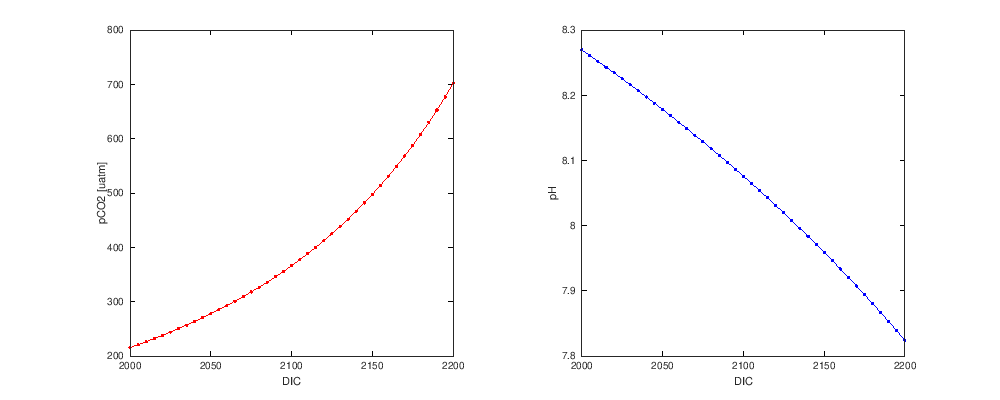

In [34]:
%%octave -s 1000,400

par1type =    1; % The first parameter supplied is of type "1", which is "alkalinity"
par1     = 2300; % value of the first parameter
par2type =    2; % The first parameter supplied is of type "1", which is "DIC"
par2     = [2000:5:2200]; % value of the second parameter, which is a long vector of different DIC's!
sal      =   35; % Salinity of the sample
tempin   =   10; % Temperature at input conditions
presin   =    0; % Pressure    at input conditions
tempout  =    0; % Temperature at output conditions - doesn't matter in this example
presout  =    0; % Pressure    at output conditions - doesn't matter in this example
sil      =   50; % Concentration of silicate  in the sample (in umol/kg)
po4      =    2; % Concentration of phosphate in the sample (in umol/kg)
pHscale  =    1; % pH scale at which the input pH is reported ("1" means "Total Scale") - doesn't matter in this example
k1k2c    =    4; % Choice of dissociation constants K1 and K2 ("4" means "Mehrbach refit")
kso4c    =    1; % Choice of KSO4 ("1" means "Dickson")

% Do the calculation. See CO2SYS's help for syntax and output format
A = CO2SYS(par1,par2,par1type,par2type,sal,tempin,tempout,presin,presout,sil,po4,pHscale,k1k2c,kso4c);

figure; clf
subplot(1,2,1)
plot(par2,A(:,4),'r.-') # The calculated pCO2's are in the 4th column of the output A of CO2SYS
xlabel('DIC'); ylabel('pCO2 [uatm]')

subplot(1,2,2)
plot(par2,A(:,3),'b.-') # The calculated pH's are in the 3rd column of the output A of CO2SYS
xlabel('DIC'); ylabel('pH')


## References

Millero, F. J.: Carbonate constants for estuarine waters, Mar. Freshwater Res., 61, 139–142, doi:10.1071/MF09254, 2010.

Orr, J. C. and Epitalon, J.-M.: Improved routines to model the ocean carbonate system: mocsy 2.0, Geosci. Model Dev., 8, 485–499, doi:10.5194/gmd-8-485-2015, 2015.

Orr, J. C., Gattuso, J.-P., and Epitalon, J.-M.: Comparison of ten packages that compute ocean carbonate chemistry, Biogeosciences, 12, 1483–1510, doi:10.5194/bg-12-1483-2015, 2015.

Waters, J., Millero, F., and Woosley, R.: Corrigendum to “The free proton concentration scale for seawater pH”,[MARCHE: 149 (2013) 8-22], Mar. Chem., 165, 66–67, 2014.